<a href="https://colab.research.google.com/github/pmj-chosim/Commit-Project-2023.1.20-2023.2.28-/blob/main/3_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/2023-02-09/4차시

/content/drive/MyDrive/2023-02-09/4차시


# Upsampling(torch) - #1


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

input = torch.arange(0,16, dtype = torch.float32).view(1,1,4,4)

print(input.shape)
print(input)

torch.Size([1, 1, 4, 4])
tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])


In [4]:
F.interpolate(input, scale_factor = 2, mode = 'nearest')

tensor([[[[ 0.,  0.,  1.,  1.,  2.,  2.,  3.,  3.],
          [ 0.,  0.,  1.,  1.,  2.,  2.,  3.,  3.],
          [ 4.,  4.,  5.,  5.,  6.,  6.,  7.,  7.],
          [ 4.,  4.,  5.,  5.,  6.,  6.,  7.,  7.],
          [ 8.,  8.,  9.,  9., 10., 10., 11., 11.],
          [ 8.,  8.,  9.,  9., 10., 10., 11., 11.],
          [12., 12., 13., 13., 14., 14., 15., 15.],
          [12., 12., 13., 13., 14., 14., 15., 15.]]]])

In [5]:
F.interpolate(input, scale_factor = 0.8, mode = 'nearest')

tensor([[[[ 0.,  1.,  2.],
          [ 4.,  5.,  6.],
          [ 8.,  9., 10.]]]])

In [6]:
F.interpolate(input, scale_factor = 2, mode = 'bilinear', align_corners = False)

tensor([[[[ 0.0000,  0.2500,  0.7500,  1.2500,  1.7500,  2.2500,  2.7500,
            3.0000],
          [ 1.0000,  1.2500,  1.7500,  2.2500,  2.7500,  3.2500,  3.7500,
            4.0000],
          [ 3.0000,  3.2500,  3.7500,  4.2500,  4.7500,  5.2500,  5.7500,
            6.0000],
          [ 5.0000,  5.2500,  5.7500,  6.2500,  6.7500,  7.2500,  7.7500,
            8.0000],
          [ 7.0000,  7.2500,  7.7500,  8.2500,  8.7500,  9.2500,  9.7500,
           10.0000],
          [ 9.0000,  9.2500,  9.7500, 10.2500, 10.7500, 11.2500, 11.7500,
           12.0000],
          [11.0000, 11.2500, 11.7500, 12.2500, 12.7500, 13.2500, 13.7500,
           14.0000],
          [12.0000, 12.2500, 12.7500, 13.2500, 13.7500, 14.2500, 14.7500,
           15.0000]]]])

In [7]:
F.interpolate(input, size=(5,3), mode = 'bilinear', align_corners = False)

tensor([[[[ 0.1667,  1.5000,  2.8333],
          [ 2.9667,  4.3000,  5.6333],
          [ 6.1667,  7.5000,  8.8333],
          [ 9.3667, 10.7000, 12.0333],
          [12.1667, 13.5000, 14.8333]]]])

# Upsampling(Upsample 함수)- #2


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

input = torch.arange(0, 16, dtype=torch.float32).reshape(1, 1, 4, 4)

U1 = nn.Upsample(scale_factor=2, mode = 'nearest')
print(U1(input))

U2 = nn.Upsample(scale_factor=0.8, mode='nearest')
print(U2(input))

tensor([[[[ 0.,  0.,  1.,  1.,  2.,  2.,  3.,  3.],
          [ 0.,  0.,  1.,  1.,  2.,  2.,  3.,  3.],
          [ 4.,  4.,  5.,  5.,  6.,  6.,  7.,  7.],
          [ 4.,  4.,  5.,  5.,  6.,  6.,  7.,  7.],
          [ 8.,  8.,  9.,  9., 10., 10., 11., 11.],
          [ 8.,  8.,  9.,  9., 10., 10., 11., 11.],
          [12., 12., 13., 13., 14., 14., 15., 15.],
          [12., 12., 13., 13., 14., 14., 15., 15.]]]])
tensor([[[[ 0.,  1.,  2.],
          [ 4.,  5.,  6.],
          [ 8.,  9., 10.]]]])


In [9]:
U3 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False)
print(U3(input))

U4 = nn.Upsample(size=(5, 3), mode='bilinear', align_corners=False)
print(U4(input))

tensor([[[[ 0.0000,  0.2500,  0.7500,  1.2500,  1.7500,  2.2500,  2.7500,
            3.0000],
          [ 1.0000,  1.2500,  1.7500,  2.2500,  2.7500,  3.2500,  3.7500,
            4.0000],
          [ 3.0000,  3.2500,  3.7500,  4.2500,  4.7500,  5.2500,  5.7500,
            6.0000],
          [ 5.0000,  5.2500,  5.7500,  6.2500,  6.7500,  7.2500,  7.7500,
            8.0000],
          [ 7.0000,  7.2500,  7.7500,  8.2500,  8.7500,  9.2500,  9.7500,
           10.0000],
          [ 9.0000,  9.2500,  9.7500, 10.2500, 10.7500, 11.2500, 11.7500,
           12.0000],
          [11.0000, 11.2500, 11.7500, 12.2500, 12.7500, 13.2500, 13.7500,
           14.0000],
          [12.0000, 12.2500, 12.7500, 13.2500, 13.7500, 14.2500, 14.7500,
           15.0000]]]])
tensor([[[[ 0.1667,  1.5000,  2.8333],
          [ 2.9667,  4.3000,  5.6333],
          [ 6.1667,  7.5000,  8.8333],
          [ 9.3667, 10.7000, 12.0333],
          [12.1667, 13.5000, 14.8333]]]])


# 영상 분할 실습(RGB 이미지 출력) - #3

In [10]:
%pip install segmentation-models-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from torch.utils.data import Dataset
import glob
import cv2
class SegDataset(Dataset):
    def __init__(self, img_dir, mask_dir, transform=None):
        self.transform = transform
        self.img = sorted(glob.glob(os.path.join(img_dir, "*.png")))
        self.mask = sorted(glob.glob(os.path.join(mask_dir, "*.png")))

    def __len__(self):
        return len(self.img)

    def __getitem__(self, item):
        img = cv2.imread(self.img[item], cv2.IMREAD_COLOR)
        mask = cv2.imread(self.mask[item],0)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        if self.transform:
            norm = torchvision.transforms.Normalize((0.485, 0.456, 0.406), 
                                                    (0.229, 0.224, 0.225))
            img = norm(self.transform(img))
            mask = self.transform(mask).squeeze(0)

            mask[mask < 0.255] = 4.0
            mask[mask < 0.35] = 3.0
            mask[mask < 0.443] = 2.0
            mask[mask < 0.54] = 1.0
            mask[mask < 0.7] = 0.0
            
        return img, mask

In [12]:
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import os

IMAGE_SIZE = 256
BATCH_SIZE = 4

val_imgs_dir = 'images/comma/RGB'
val_masks_dir = 'images/comma/GT'

preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    ])
valset = SegDataset(val_imgs_dir, val_masks_dir, transform=preprocess)
val_loader = DataLoader(valset, BATCH_SIZE)

In [13]:
from torch.utils.data import Dataset
import glob
import cv2
import numpy as np

class SegDataset_visual(Dataset):
    def __init__(self, img_dir, mask_dir, transform=None):
        self.transform = transform
        self.img = sorted(glob.glob(os.path.join(img_dir, "*.png")))
        self.mask = sorted(glob.glob(os.path.join(mask_dir, "*.png")))

    def __len__(self):
        return len(self.img)

    def __getitem__(self, item):
        img = cv2.imread(self.img[item], cv2.IMREAD_COLOR)
        mask = cv2.imread(self.mask[item],0)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        if self.transform:
            img = self.transform(img)
            mask = self.transform(mask).squeeze(0)
        return img, mask
        
valset_visual = SegDataset_visual(val_imgs_dir, val_masks_dir, transform=preprocess)
val_loader_visual = DataLoader(valset_visual, BATCH_SIZE)
dataiter = iter(val_loader_visual)
image_visual, mask_visual = next(dataiter)
pred_image_visual = image_visual[1:2]
mask_visual = mask_visual[1:2]
pred_image_visual = pred_image_visual.squeeze(0).numpy()
pred_image_visual = np.transpose(pred_image_visual, (1,2,0))

torch.Size([4, 3, 256, 256])
torch.Size([4, 256, 256])


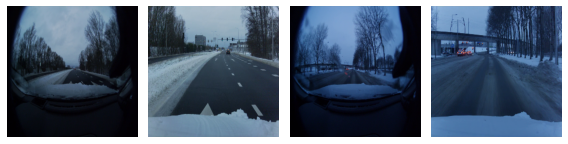

In [14]:
from matplotlib import pyplot as plt
import torchvision.utils
import numpy as np

#데이터를 확인해보기위해 iter 함수로 첫번째 데이터 루프를 할당
loader = iter(val_loader_visual)
images, labels = next(loader)

print(images.shape)
print(labels.shape)

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

plt.figure(figsize=(8,8))
for n, (image, label) in enumerate(zip(images, labels), start=1):

    plt.subplot(4,4,n)
    imshow(image)
    plt.axis('off')

plt.tight_layout()
plt.show()

torch.Size([4, 3, 256, 256])
torch.Size([4, 256, 256])


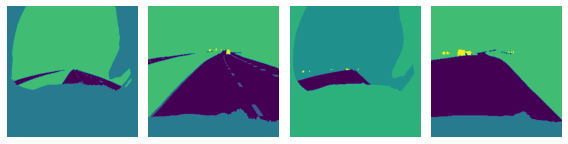

In [15]:
from matplotlib import pyplot as plt
import torchvision.utils
import numpy as np

#데이터를 확인해보기위해 iter 함수로 첫번째 데이터 루프를 할당
loader = iter(val_loader_visual)
images, labels = next(loader)

print(images.shape)
print(labels.shape)

def imshow(img):
    npimg = img.numpy()
    plt.imshow(npimg)

plt.figure(figsize=(8,8))
for n, (image, label) in enumerate(zip(images, labels), start=1):

    plt.subplot(4,4,n)
    imshow(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

# 영상분할실습(Unet모델 저장) - #4


In [16]:
import torch
import os
import torch.nn as nn
import torchvision
import segmentation_models_pytorch as smp

class Unet2(nn.Module):
    def __init__(self, chkpt_dir="weight"):
        super(Unet2,self).__init__()
        self.file = os.path.join(chkpt_dir, "Unet_mobile")
        self.base_model = smp.Unet('mobilenet_v2', encoder_weights='imagenet', 
                                   classes=5, activation=None, encoder_depth=5, 
                                   decoder_channels=[256, 128, 64, 32, 16])
    
    def forward(self,x):
        return self.base_model(x)

    def save(self):
        torch.save(self.state_dict(), self.file)

    def load(self):
        self.load_state_dict(torch.load(self.file))

In [17]:
class SegNetV2(nn.Module):
    def __init__(self, chkpt_dir="weight"):
        super(SegNetV2,self).__init__()
        self.file = os.path.join(chkpt_dir, "segnet_v2_epoch50")
        self.base_model = torchvision.models.segmentation.deeplabv3_resnet101(False, num_classes=5)

    def forward(self,x):
        return self.base_model(x)['out']

    def save(self):
        torch.save(self.state_dict(), self.file)

    def load(self):
        self.load_state_dict(torch.load(self.file))

# 영상분할실습(커스텀 데이터셋) - #5

In [18]:
from torch.utils.data import Dataset
import glob
import cv2
class SegDataset(Dataset):
    def __init__(self, img_dir, mask_dir, transform=None):
        self.transform = transform
        self.img = sorted(glob.glob(os.path.join(img_dir, "*.png")))
        self.mask = sorted(glob.glob(os.path.join(mask_dir, "*.png")))

    def __len__(self):
        return len(self.img)

    def __getitem__(self, item):
        img = cv2.imread(self.img[item], cv2.IMREAD_COLOR)
        mask = cv2.imread(self.mask[item],0)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        if self.transform:
            norm = torchvision.transforms.Normalize((0.485, 0.456, 0.406), 
                                                    (0.229, 0.224, 0.225))
            img = norm(self.transform(img))
            mask = self.transform(mask).squeeze(0)

            mask[mask < 0.255] = 4.0
            mask[mask < 0.35] = 3.0
            mask[mask < 0.443] = 2.0
            mask[mask < 0.54] = 1.0
            mask[mask < 0.7] = 0.0
            
        return img, mask

# 영상분할실습(데이터 변환,모델 불러오기) - #6


In [19]:
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

IMAGE_SIZE = 256
BATCH_SIZE = 4

val_imgs_dir = 'images/comma/RGB'
val_masks_dir = 'images/comma/GT'

preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    ])
valset = SegDataset(val_imgs_dir, val_masks_dir, transform=preprocess)
val_loader = DataLoader(valset, BATCH_SIZE)

In [20]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [21]:
model = Unet2()
model.load()

model2 = SegNetV2()
model2.load()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


# 영상분할실습(모델선언 및 이미지 출력) - #7


In [22]:
model.eval()
model.to(device)

dataiter = iter(val_loader)
image, mask = next(dataiter)

print(image.shape)
print(mask.shape)

torch.Size([4, 3, 256, 256])
torch.Size([4, 256, 256])


In [23]:
pred_image = image[1:2].to(device)
mask = mask[1:2].to(device)
print(pred_image.shape)
print(mask.shape)

torch.Size([1, 3, 256, 256])
torch.Size([1, 256, 256])


# 영상분할실습(평가 및 예측값 출력) - #8

In [24]:
import torch.nn.functional as F
import numpy as np

def mIoU(pred_mask, mask, smooth=1e-10, n_classes=5): #pred_mask = output, mask = mask
    with torch.no_grad():
        pred_mask = F.softmax(pred_mask, dim=1)
        pred_mask = torch.argmax(pred_mask, dim=1)
        pred_mask = pred_mask.contiguous().view(-1)
        mask = mask.contiguous().view(-1)

        iou_per_class = []
        for clas in range(0, n_classes): #loop per pixel class
            true_class = pred_mask == clas
            true_label = mask == clas
          
            #True, False, 교와 합을 합친거임.
            intersect = torch.logical_and(true_class, true_label).sum().float().item()
            union = torch.logical_or(true_class, true_label).sum().float().item()
            
            iou = (intersect + smooth) / (union +smooth)
            iou_per_class.append(iou)
        return np.nanmean(iou_per_class)

In [25]:
output = model(pred_image)
print(output.shape)
masked = torch.argmax(output, dim=1)
print(masked.shape)
score = mIoU(output, mask)
print(score)

torch.Size([1, 5, 256, 256])
torch.Size([1, 256, 256])
0.367748883996742


In [28]:
output

tensor([[[[-0.0774,  0.3404,  0.2304,  ...,  0.0620, -0.1514, -0.0587],
          [-0.2001,  0.3894,  0.3128,  ..., -0.5799, -0.7556, -0.2517],
          [-0.0685,  0.5632,  0.4571,  ..., -0.7425, -0.9509, -0.4593],
          ...,
          [-0.2640, -0.0729, -0.3371,  ...,  0.1350,  0.1116, -0.0371],
          [-0.2428, -0.1284, -0.1020,  ..., -0.2588, -0.0999, -0.2568],
          [-0.2686, -0.1103, -0.0518,  ..., -0.2929, -0.3232, -0.5164]],

         [[ 0.6250,  0.9779,  0.9369,  ...,  0.3506,  0.9158,  0.1856],
          [ 0.4819,  1.0068,  1.0477,  ...,  0.3863,  0.2881,  0.2102],
          [ 0.8064,  1.6466,  1.9253,  ...,  0.7502,  0.5843,  0.2949],
          ...,
          [ 0.1943,  0.7676,  1.1866,  ...,  1.0101,  1.1417,  0.8394],
          [ 0.4713,  0.9247,  1.1454,  ...,  1.1639,  1.0293,  0.9078],
          [ 0.1978,  0.5449,  0.5558,  ...,  0.8016,  0.5325,  0.6128]],

         [[ 0.3883,  0.1601,  0.1648,  ...,  0.2300,  0.4125,  0.0207],
          [ 0.8557,  0.6972,  

In [26]:
pred_image = pred_image.cpu().data[0].numpy().transpose(1,2,0)
mask = mask.cpu().numpy()[0]
masked = masked.cpu().numpy().transpose(1,2,0)
print(pred_image.shape)
print(mask.shape)
print(masked.shape)

(256, 256, 3)
(256, 256)
(256, 256, 1)


# 영상분할실습(예측 이미지 출력) - #9

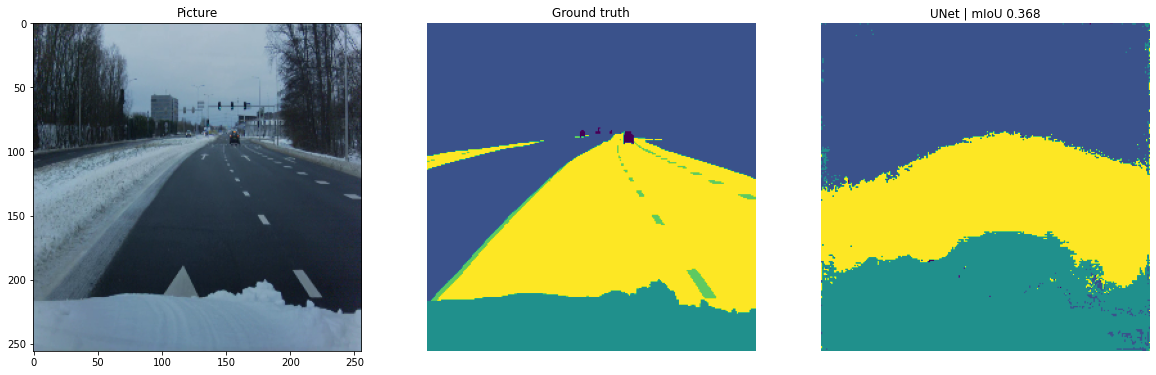

In [27]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,10))

ax1.imshow(pred_image_visual)
ax1.set_title('Picture');

ax2.imshow(mask)
ax2.set_title('Ground truth')
ax2.set_axis_off()

ax3.imshow(masked.transpose(2,0,1)[0])
ax3.set_title('UNet | mIoU {:.3f}'.format(score))
ax3.set_axis_off()

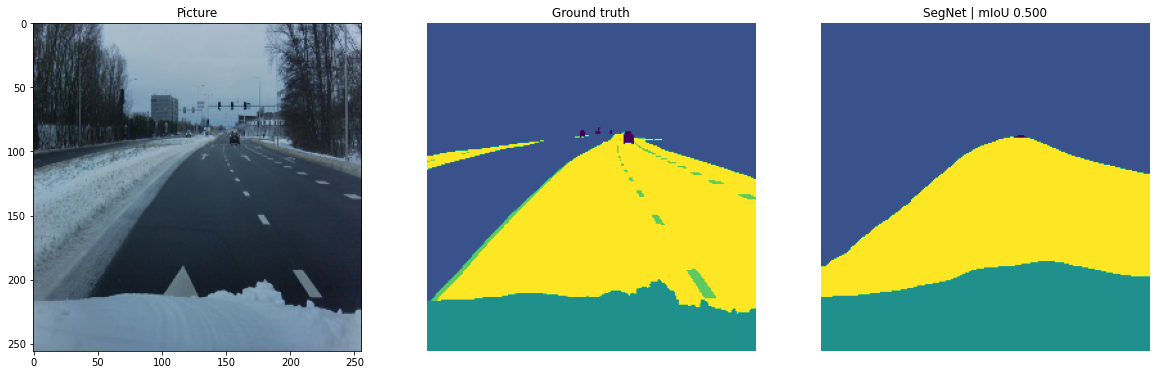

In [28]:
model2.eval()
model2.to(device)

dataiter = iter(val_loader)
image, mask = next(dataiter)
pred_image = image[1:2].to(device)
mask = mask[1:2].to(device)

output = model2(pred_image)
masked = torch.argmax(output, dim=1)
score = mIoU(output, mask)
pred_image = pred_image.cpu().data[0].numpy().transpose(1,2,0)
mask = mask.cpu().numpy()[0]
masked = masked.cpu().numpy().transpose(1,2,0)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,10))

ax1.imshow(pred_image_visual)
ax1.set_title('Picture');

ax2.imshow(mask)
ax2.set_title('Ground truth')
ax2.set_axis_off()

ax3.imshow(masked.transpose(2,0,1)[0])
ax3.set_title('SegNet | mIoU {:.3f}'.format(score))
ax3.set_axis_off()